# Compute performance metrics for the given Y and Y_score without sklearn

## A. Compute performance metrics for the given data '5_a.csv'

 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) 
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [21]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv(r'C:\Users\NADEEM\Downloads\5_a.csv')

In [23]:
df.shape

(10100, 2)

In [24]:
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [25]:
t_hold = 0.5
df['y_pred'] = (df.proba >= 0.5).astype('int')
df.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


### Computing Confusion Matrix, F1 Score, Accuracy Score

In [26]:
def comp_TP_TN_FP_FN(y,y_pred):
    '''
    True Positive(TP): [actual,prediction]=[1,1]
    True Negetive(TN): [actual,prediction]=[0,0]
    False Positive(FP): [actual,prediction]=[0,1]
    False Negetive(FN): [actual,prediction]=[1,0]
    '''
    TP = sum((y == 1) &(y_pred==1))
    TN = sum((y == 0) &(y_pred==0))
    FP = sum((y == 0) &(y_pred==1))
    FN = sum((y == 1) &(y_pred==0))
    return TP, TN, FP, FN

def acc_score(TP, TN, FP, FN):
    '''
    ACCURACY = TP+TN/TP+TN+FP+FN
    '''
    return ((TP+TN)*100)/float(TP+TN+FP+FN)

def comp_precision(TP, FP):
    '''
    PRECISION : TP/TP+FP
    '''
    return TP/(TP+FP)

def comp_recall(TP, FN):
    '''
    RECALL: TP/TP+FN
    '''
    return TP/(TP+FN)

def f_score(y, y_pred):
    '''
    F1_Score : (2*Pr*Re)/(Pr+Re)
    '''
    TP, TN, FP, FN = comp_TP_TN_FP_FN(y,y_pred)
    Precision = comp_precision(TP, FP)
    Recall = comp_recall(TP, FN)
    F1_score = (2*Precision*Recall)/(Precision+Recall)
    return F1_score

In [27]:
TP_C, TN_C, FP_C, FN_C = comp_TP_TN_FP_FN(df.y, df.y_pred)
print('TP: ',TP_C)
print('TN: ',TN_C)
print('FP: ',FP_C)
print('FN: ',FN_C)

TP:  10000
TN:  0
FP:  100
FN:  0


In [28]:
print('Accuracy Score: ',acc_score(TP_C, TN_C, FP_C, FN_C))

Accuracy Score:  99.00990099009901


In [29]:
print('Precision: ',comp_precision(TP_C, FP_C))

Precision:  0.9900990099009901


In [30]:
print("Recall: ",comp_recall(TP_C, FN_C))

Recall:  1.0


In [31]:
Pr = comp_precision(TP_C, FP_C)
Re = comp_recall(TP_C, FN_C)

In [32]:
print('F1_Score: ',f_score(df.y, df.y_pred))

F1_Score:  0.9950248756218906


In [33]:
def get_single_tpr_fpr(df):
    
    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


# While computing AUC score we need to calculate "TP,"FP" at every threshold by using actual "y" and predicted "y_pred".

def calculate_all_thresholds_tpr_fpr_arr(df_original):

    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df = df_original.sort_values(by=['proba'], ascending=False)

    unique_prob_thres = sorted_df['proba'].unique()

    for threshold in tqdm(unique_prob_thres):
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds

In [34]:
from tqdm import tqdm
all_tpr_together_5a, all_fpr_together_5a = calculate_all_thresholds_tpr_fpr_arr(df)
auc_score_5a = np.trapz(all_tpr_together_5a, all_fpr_together_5a)
print('My Custom function ROC-AUC Score for 5_a.csv: ', auc_score_5a)
print(1-auc_score_5a)

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [01:10<00:00, 142.69it/s]

My Custom function ROC-AUC Score for 5_a.csv:  0.48829900000000004
0.511701


Text(0.5,1,'AUC=0.4883')

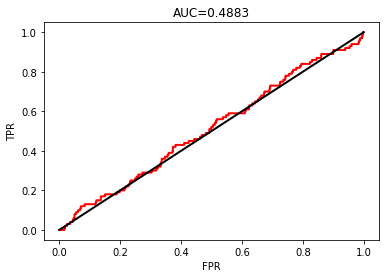

In [36]:
import matplotlib.pyplot as plt
plt.plot(all_tpr_together_5a, all_fpr_together_5a, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_5a, 4)))

## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) 
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [14]:
df_B = pd.read_csv(r'C:\Users\NADEEM\Music\Applied course\Module Notes\5_b.csv')

In [15]:
df_B.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [16]:
t_hold = 0.5
df_B['y_pred_B'] = (df_B.proba >= 0.5).astype('int')
df_B.head()

,y,proba,y_pred_B
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


### Computing Confusion Matrix, F1 Score, Accuracy Score

In [19]:
TP_C, TN_C, FP_C, FN_C = comp_TP_TN_FP_FN(df_B.y, df_B.y_pred_B)
print('TP: ',TP_C)
print('TN: ',TN_C)
print('FP: ',FP_C)
print('FN: ',FN_C)

print('Accuracy Score: ',acc_score(TP_C, TN_C, FP_C, FN_C))

print('Precision: ',comp_precision(TP_C, FP_C))

print("Recall: ",comp_recall(TP_C, FN_C))

print('F1_Score: ',f_score(df_B.y,df_B.y_pred_B))

TP:  55
TN:  9761
FP:  239
FN:  45
Accuracy Score:  97.18811881188118
Precision:  0.1870748299319728
Recall:  0.55
F1_Score:  0.2791878172588833


In [38]:
def get_single_tpr_fpr(df_B):
    
    tp = ((df_B['y'] == 1.0 ) & (df_B['y_pred_B'] == 1)).sum()
    fp = ((df_B['y'] == 0.0 ) & (df_B['y_pred_B'] == 1)).sum()
    tn = ((df_B['y'] == 0.0 ) & (df_B['y_pred_B'] == 0)).sum()
    fn = ((df_B['y'] == 1.0 ) & (df_B['y_pred_B'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


# While computing AUC score you need to calculate "TP,"FP" at every threshold by using actual "y" and predicted "y_pred".

def calculate_all_thresholds_tpr_fpr_arr(df_B_original):

    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df_B = df_B_original.sort_values(by=['proba'], ascending=False)

    unique_prob_thres = sorted_df_B['proba'].unique()

    for threshold in tqdm(unique_prob_thres):
        sorted_df_B['y_pred_B'] = np.where(sorted_df_B['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df_B)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds

In [39]:
from tqdm import tqdm
all_tpr_together_5b, all_fpr_together_5b = calculate_all_thresholds_tpr_fpr_arr(df_B)
auc_score_5b = np.trapz(all_tpr_together_5b, all_fpr_together_5b)
print('My Custom function ROC-AUC Score for 5b.csv: ', auc_score_5b)

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [01:10<00:00, 143.61it/s]

My Custom function ROC-AUC Score for 5b.csv:  0.9377570000000001


Text(0.5,1,'AUC=0.9378')

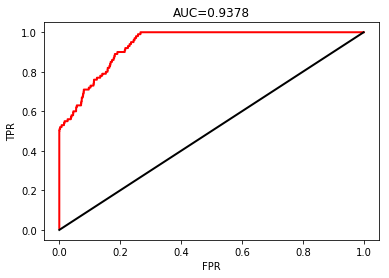

In [41]:
import matplotlib.pyplot as plt
plt.plot(all_fpr_together_5b, all_tpr_together_5b, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_5b, 4)))

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [37]:
df_C = pd.read_csv(r"C:\Users\NADEEM\Music\Applied course\Module Notes\5_c.csv")

In [38]:
print(df_C.shape)
df_C.head()

(2852, 2)


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [39]:
actual_y_train= df_C.iloc[:, 0].values
print('actual_y_train ', actual_y_train)

y_prob_C = df_C.iloc[:, 1].values
print('y_prob_C ', y_prob_C)

unique_prob_thres_C = np.unique(df_C['prob'])

actual_y_train  [0 0 0 ... 1 1 1]
y_prob_C  [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [40]:
def get_A_metric(y_actual, y_probabilities, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    min_a = float('inf')

    for i in range(len(y_probabilities)):
        if y_probabilities[i] >= threshold :
            if y_actual[i] == 1:
                tp += 1
            else:
                fp += 1

        if y_probabilities[i] < threshold:
            if y_actual[i] == 0:
                tn += 1
            else:
                fn += 1

    A = (500 * fn) + (100 * fp)

    return A

In [41]:

def get_minimized_a(y_actual, y_probabilities, total_threshold ):
  min_a = float('inf')
  min_t = 0

  for threshold in total_threshold:
    a = get_A_metric(y_actual, y_probabilities, threshold)
    if a <= min_a:
        min_a = min(a, min_a)
        min_t = threshold

  return min_a, min_t

In [43]:
print(get_minimized_a(actual_y_train, y_prob_C, unique_prob_thres_C ))

(141000, 0.2300390278970873)



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE</li>
<li> Compute R^2 error</li>
</ol>
</pre>

In [103]:
df_D = pd.read_csv(r"C:\Users\NADEEM\Music\Applied course\Module Notes\5_d.csv")

In [104]:
df_D.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [109]:
actual_value= df_D.iloc[:, 0].values
print('Actual Value: ', actual_value)

model_output = df_D.iloc[:, 1].values
print('Model Output: ', model_output)

Actual Value:  [101. 120. 131. ... 106. 105.  81.]
Model Output:  [100. 100. 113. ...  93. 101. 104.]


### Calculation of Mean Squared Error (MSE)

In [110]:
def calc_MSE(y,pred):
    MSE = np.mean((y-pred)**2)
    return MSE
print(calc_MSE(actual_value,model_output))

177.16569974554707


### Calculation of Mean Absolute Percentage Error (MAPE)

In [113]:
def calc_MAPE(y,pred):
    MAPE = np.mean(np.abs(y-pred)/np.mean(y))*100
    return MAPE
print(calc_MAPE(actual_value,model_output))

12.912029940096867


### Calculation of R2_Error

In [114]:
def calc_R2_error(y,pred):
    actual_value_mean = y.mean()
    SS_res = ((actual_value - model_output)**2).sum()
    SS_tot = ((actual_value - actual_value_mean)**2).sum()
    R2_error = 1-(SS_res/SS_tot)
    return R2_error

print(calc_R2_error(actual_value,model_output))

0.9563582786990937
